<a href="https://colab.research.google.com/github/nithindsouza/Data_Augmentation_technique/blob/main/CNN_data_aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Apply **data augmentation** techniques(rotation, zoom, width shift , height shift and horizontal flip) for the following images.

Dataset: [Image-Data](https://github.com/nithindsouza/CNN_data_aug_dataset)


In [27]:
#required libraries
import cv2
import os
from PIL import Image
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [28]:
#Clone dataset into Google collab
!git clone https://github.com/nithindsouza/CNN_data_aug_dataset.git

Cloning into 'CNN_data_aug_dataset'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 20 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.


In [29]:
#assigning data to a variable
img_data = '/content/CNN_data_aug_dataset/images/'
aug_dir = '/content/CNN_data_aug_dataset/augmented/'

In [30]:
#counting total number of images present
print('total images:', len(os.listdir(img_data)))

total images: 7


In [31]:
#viewing file names
os.listdir(img_data)

['004545.jpg',
 '000067.jpg',
 '000001.jpg',
 '000542.jpg',
 '001763.jpg',
 '001150.jpg',
 '000456.jpg']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  del sys.path[0]


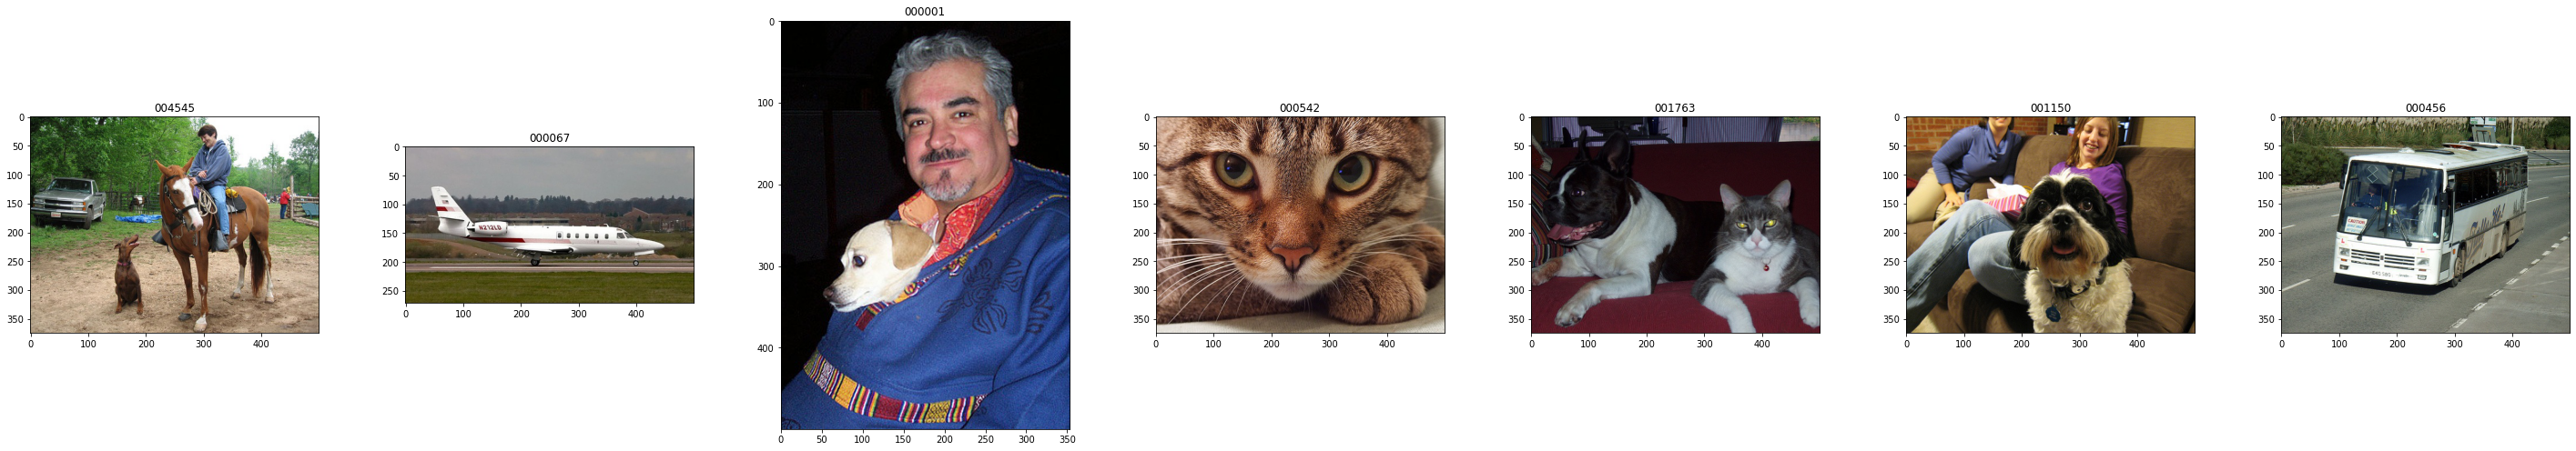

In [32]:
#displaying all the images in a subplot

# Put all images in the folder into a list
def main():
  images = []
  for f in glob(img_data+"/*jpg"):
      images.append(np.asarray(Image.open(f)))

  for f in glob(aug_dir+"/*jpg"):
    os.remove(f)

  # plot the images
  images = np.array(images)
  fig, axs = plt.subplots(1, 7, figsize=(50, 50))
  fig.subplots_adjust(hspace = .3, wspace=.3)
  axs = axs.ravel()

  #displaying the names
  for filename in os.listdir(img_data):
    imgName = filename[:-4]

  # showing the filename as its title
  i = 0
  for filename in os.listdir(img_data):
    imgName = filename[:-4]
    axs[i].imshow(images[i])
    axs[i].set_title(imgName)
    i += 1
if __name__ == '__main__':
  main()

In [33]:
#Data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img

datagen = ImageDataGenerator(rotation_range=40,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode = 'nearest')
#Manually read each image and create an array to be supplied to datagen via flow method
SIZE = 150
dataset = []

my_images = os.listdir(img_data)
for i, image_name in enumerate(my_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = io.imread(img_data + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE,SIZE))
        dataset.append(np.array(image))

x = np.array(dataset)
#x = x.reshape((1,) + x.shape)
i = 0
#clearing the folder to store augmented data
for f in glob(aug_dir+"/*jpg"):
  os.remove(f)

for batch in datagen.flow(x, batch_size=1,  
                          save_to_dir='/content/CNN_data_aug_dataset/augmented', 
                          save_prefix='aug', 
                          save_format='jpg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

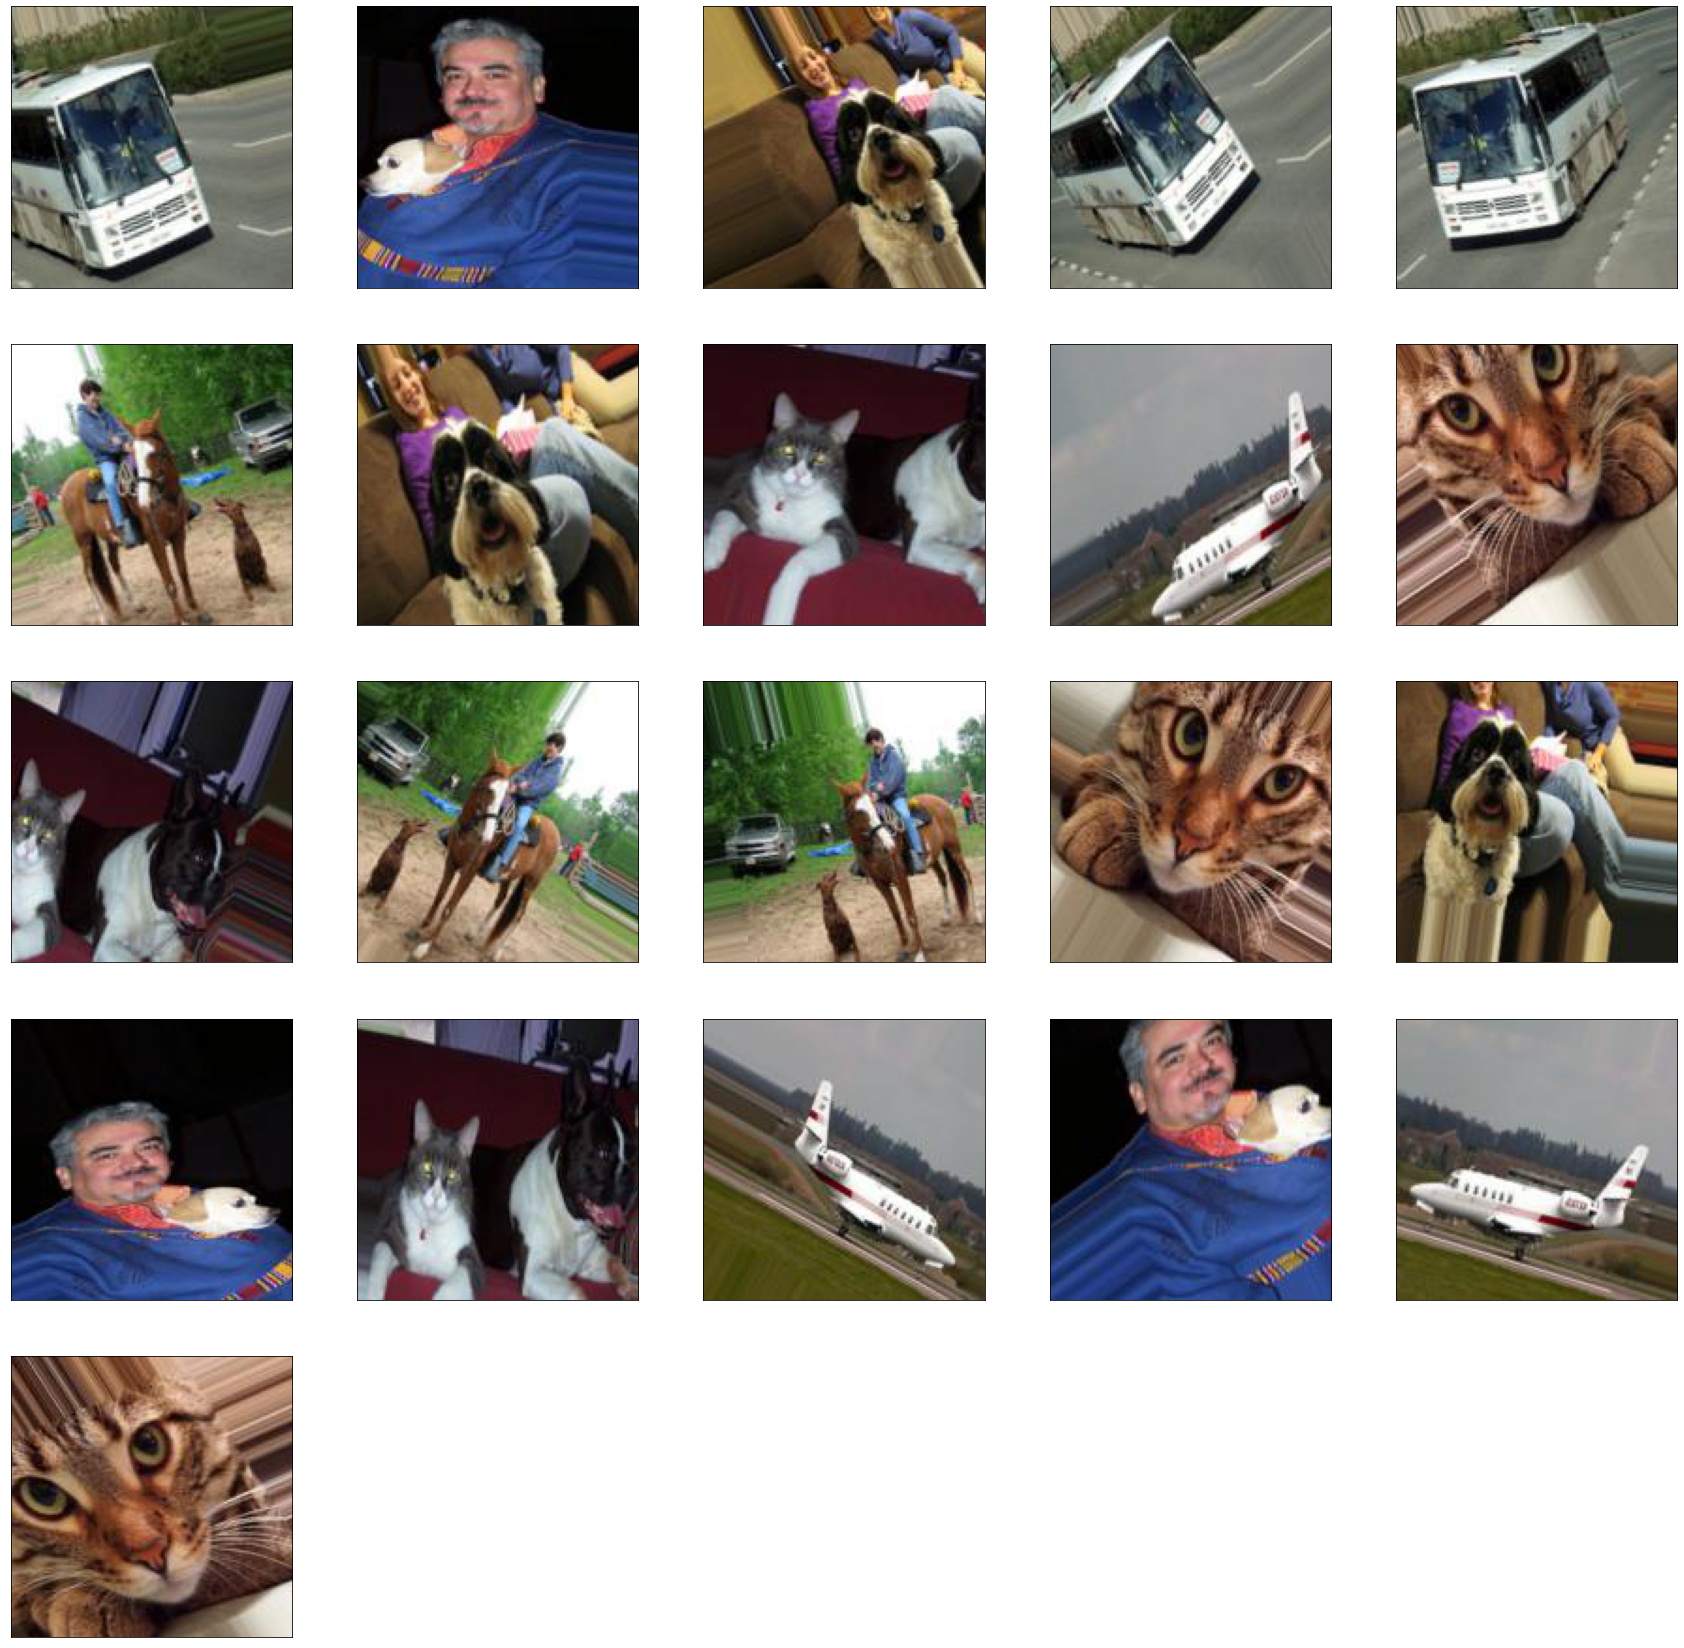

In [34]:
#displaying all augmented images
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in glob.glob(aug_dir+"/*jpg"):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(30,30))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])